# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [6]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import AgglomerativeClustering

np.random.seed(5)

%matplotlib inline

For n_clusters = 2 The average silhouette_score is : 0.681046169211746
For n_clusters = 3 The average silhouette_score is : 0.5528190123564091
For n_clusters = 4 The average silhouette_score is : 0.4980505049972867
For n_clusters = 5 The average silhouette_score is : 0.4887488870931048
For n_clusters = 6 The average silhouette_score is : 0.3678464984712235
For n_clusters = 7 The average silhouette_score is : 0.3588294450965675
For n_clusters = 8 The average silhouette_score is : 0.34901133143367136
For n_clusters = 9 The average silhouette_score is : 0.3247749396939589
For n_clusters = 10 The average silhouette_score is : 0.3190032789646385


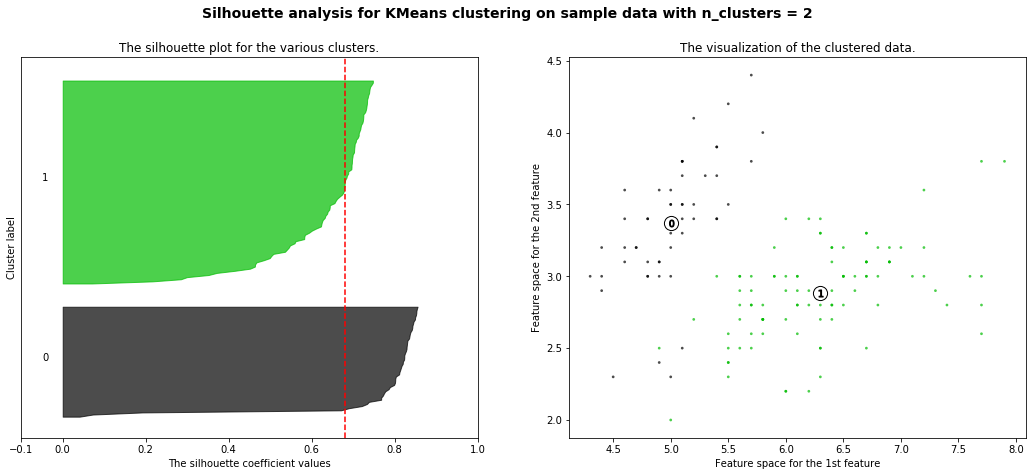

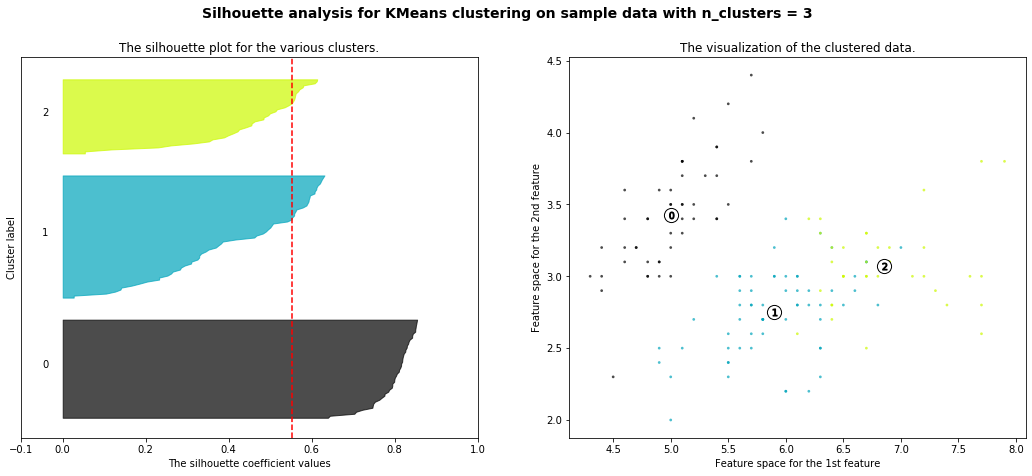

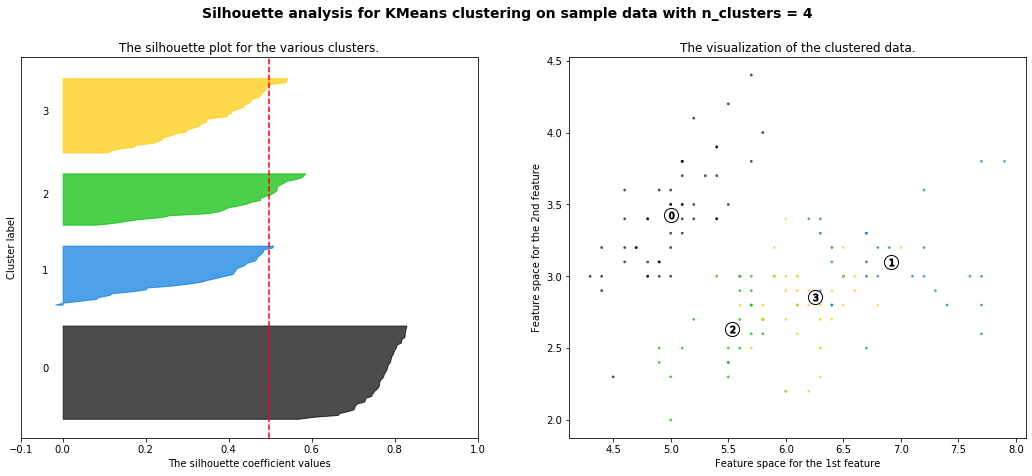

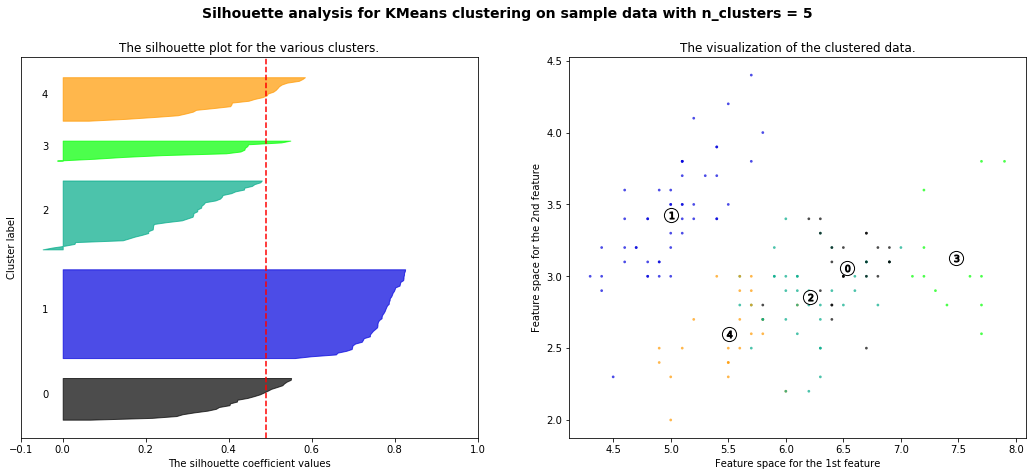

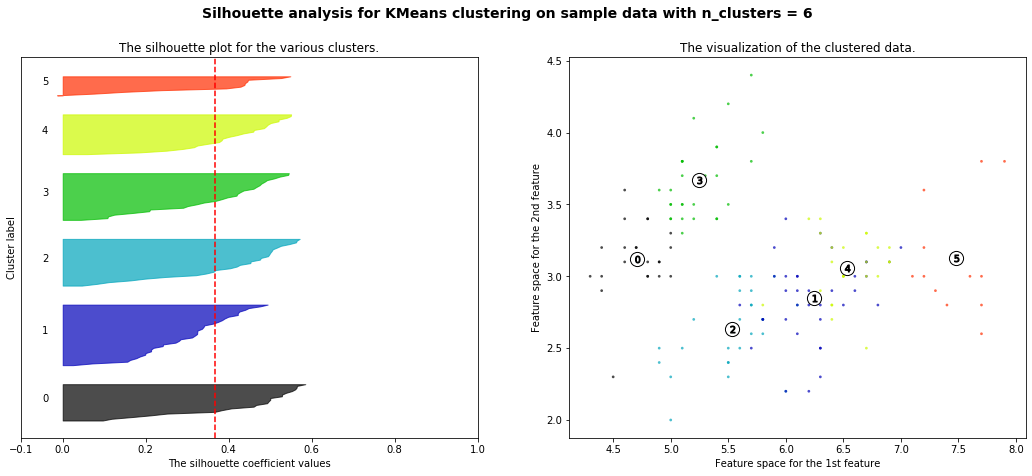

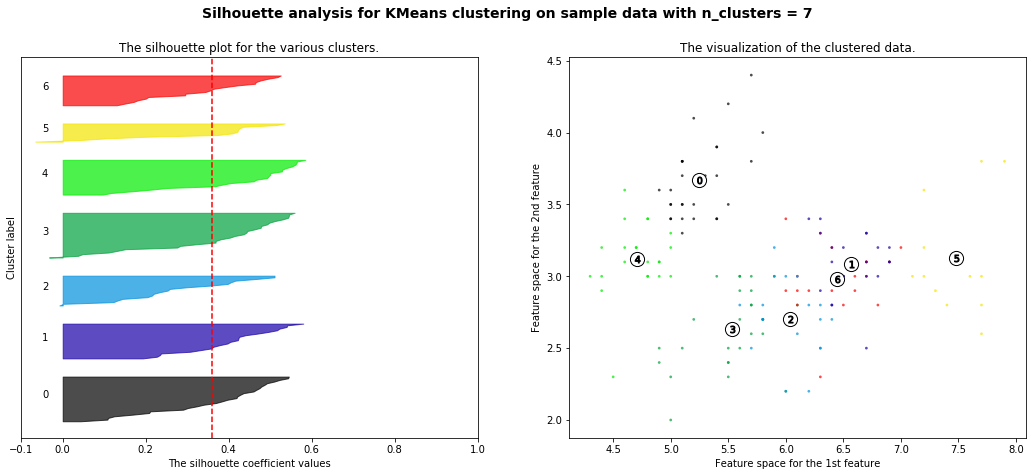

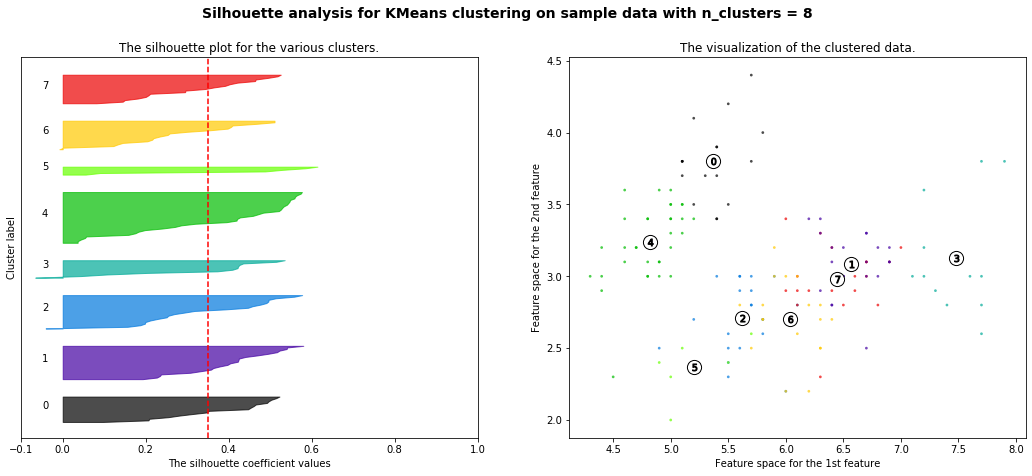

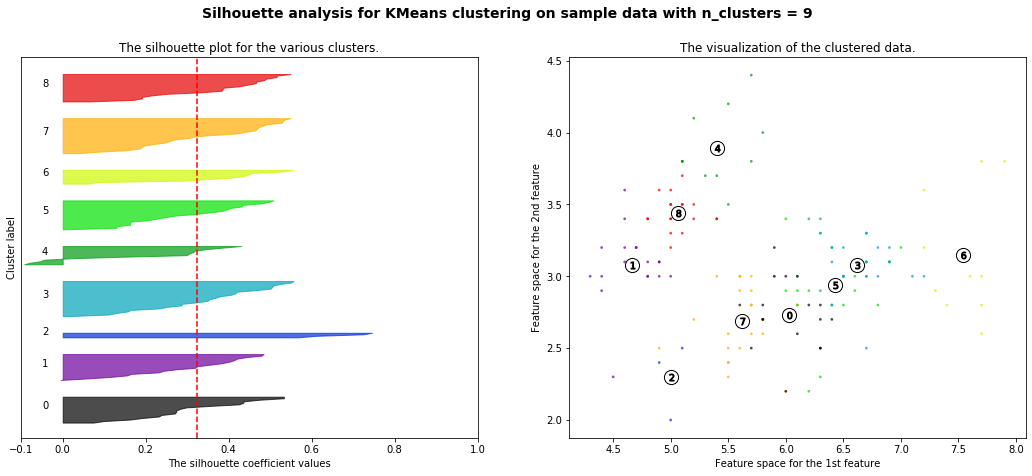

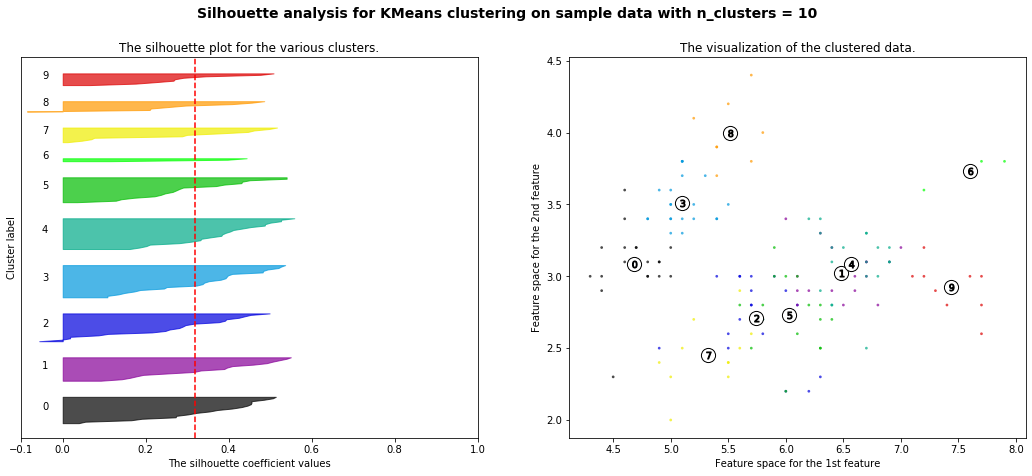

In [8]:
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # 計算所有點的 silhouette_score 平均
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # 計算所有樣本的 The silhouette_score
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # 收集集群 i 樣本的輪廓分數，並對它們進行排序
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # 在每個集群中間標上 i 的數值
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 計算下一個 y_lower 的位置
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # 將 silhouette_score 平均所在位置, 畫上一條垂直線
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # 清空 y 軸的格線
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 右圖我們用來畫上每個樣本點的分群狀態, 從另一個角度觀察分群是否洽當
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # 在右圖每一群的中心處, 畫上一個圓圈並標註對應的編號
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

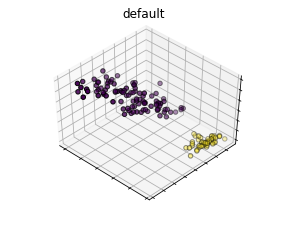

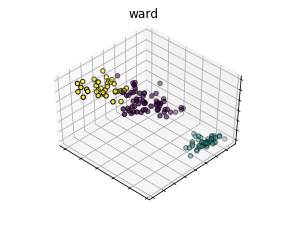

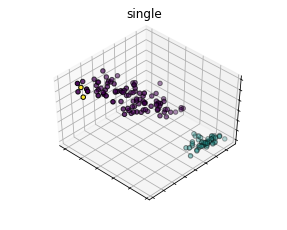

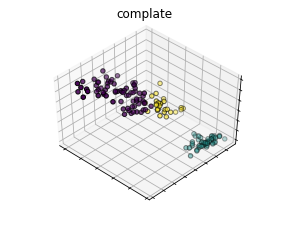

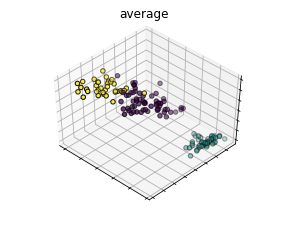

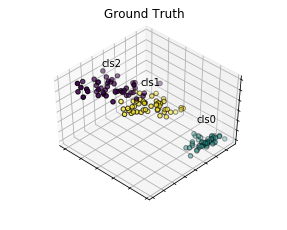

In [9]:
estimators = [('hc_default', AgglomerativeClustering()),
              ('hc_ward', AgglomerativeClustering(n_clusters=3, linkage="ward")),
              ('hc_single', AgglomerativeClustering(n_clusters=3, linkage="single")),
              ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage="complete")),
              ('hc_average', AgglomerativeClustering(n_clusters=3, linkage="average"))]

fignum = 1
titles = ['default', 'ward', 'single', 'complate', 'average']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12